# Defining and Solving Reinforcement Learning Task

### Define an RL Environment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces

class LawnmowerGridWorld(gym.Env):
    def __init__(self):
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Tuple((spaces.Discrete(4), spaces.Discrete(4)))
        self.state = np.array([0, 0])
        self.goal = np.array([3, 3])
        self.grid_rewards = np.array([
            [0, -5, 0, 5],
            [0, 6, -6, 0],
            [-5, 0, 6, 0],
            [0, 0, 0, 10] 
        ])

    def step(self, action):
        if action == 0: 
            self.state[0] = max(0, self.state[0] - 1)
        elif action == 1: 
            self.state[0] = min(3, self.state[0] + 1)
        elif action == 2:
            self.state[1] = min(3, self.state[1] + 1)
        elif action == 3:
            self.state[1] = max(0, self.state[1] - 1)

        reward = self.grid_rewards[self.state[0], self.state[1]]
        done = (self.state == self.goal).all()

        return self.state, reward, done, {}

    def reset(self):
        self.state = np.array([0, 0])
        return self.state

    def render(self):
        plt.imshow(self.grid_rewards, cmap='coolwarm', interpolation='nearest')
        plt.text(self.goal[1], self.goal[0], 'Goal', ha='center', va='center', color='black')
        plt.text(self.state[1], self.state[0], 'Current', ha='center', va='center', color='black')
        plt.show()

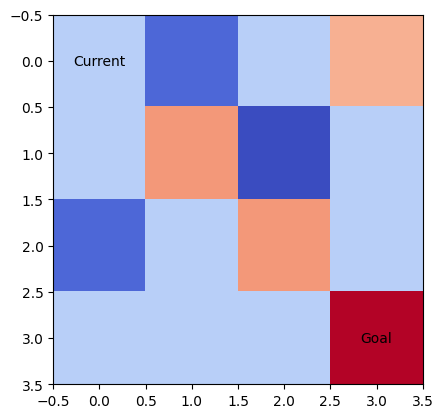

Step 1: State=[0 0], Action=0, Reward=0


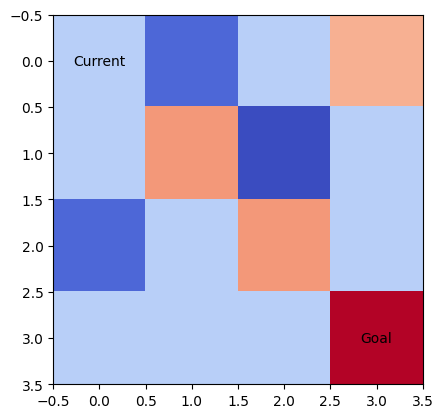

Step 2: State=[0 0], Action=0, Reward=0


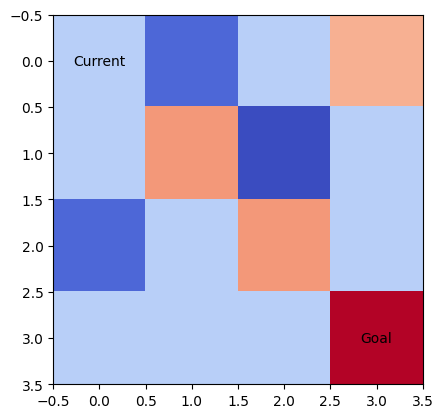

Step 3: State=[1 0], Action=1, Reward=0


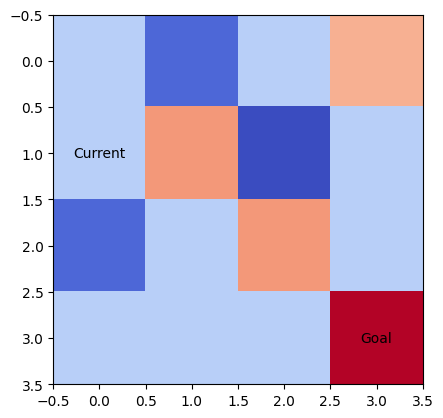

Step 4: State=[1 1], Action=2, Reward=6


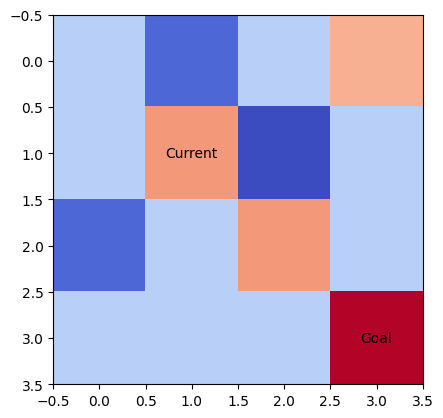

Step 5: State=[1 0], Action=3, Reward=0


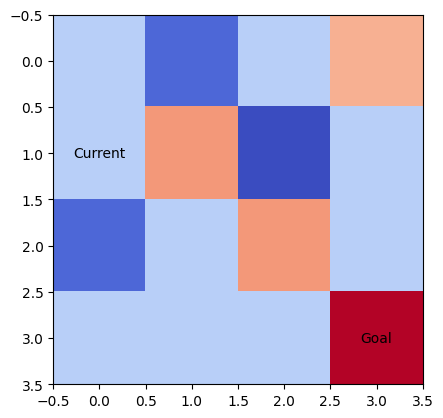

Step 6: State=[2 0], Action=1, Reward=-5


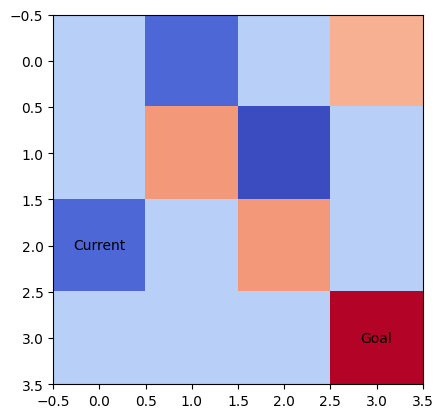

Step 7: State=[3 0], Action=1, Reward=0


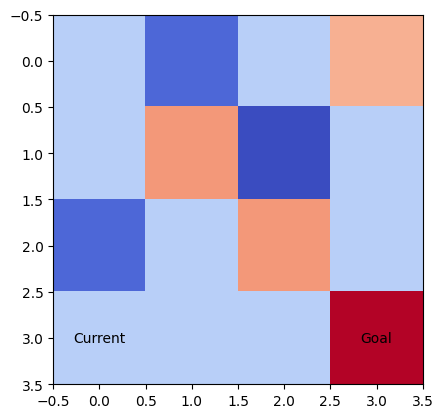

Step 8: State=[2 0], Action=0, Reward=-5


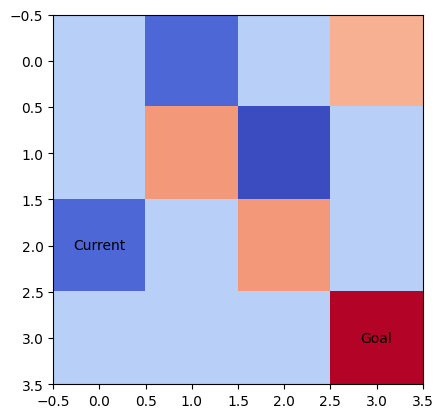

Step 9: State=[1 0], Action=0, Reward=0


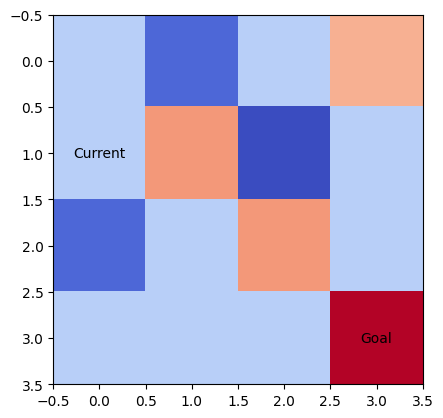

Step 10: State=[1 0], Action=3, Reward=0


In [2]:
env = LawnmowerGridWorld()

for t in range(10):
    env.render()
    action = env.action_space.sample()
    state, reward, done, _ = env.step(action)
    print(f"Step {t+1}: State={state}, Action={action}, Reward={reward}")

    if done:
        print("Goal reached!")
        break

## Solve your environment using SARSA

### Applying SARSA algorithm 

In [3]:
!pip install optuna

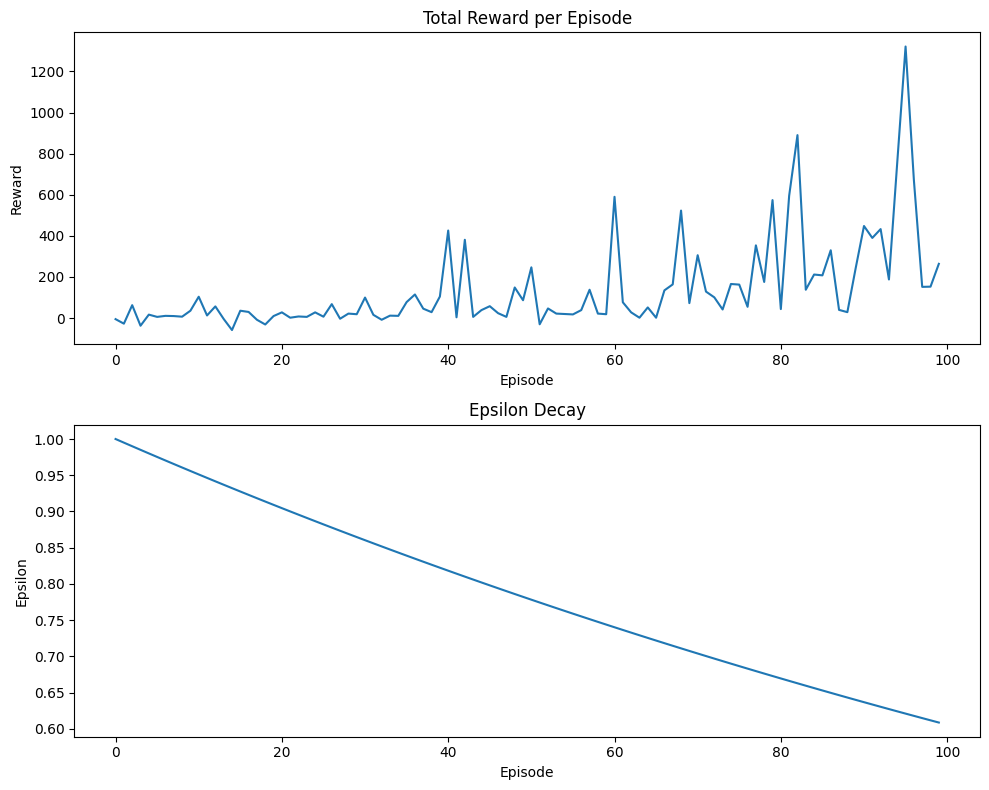


Total average reward for this configuration: 138.60


In [4]:
class Agent:
    def __init__(self, env, learning_rate=0.1, discount_factor=0.99, epsilon=1.0, epsilon_min=0.01, epsilon_decay=0.995):
        self.env = env
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay
        self.q_table = np.zeros((env.observation_space[0].n, env.observation_space[1].n, env.action_space.n))

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return self.env.action_space.sample()
        else:
            return np.argmax(self.q_table[state])

    def learn(self, state, action, reward, next_state, done):
        predict = self.q_table[state][action]
        target = reward + self.discount_factor * np.max(self.q_table[next_state]) * (1 - done)
        self.q_table[state][action] += self.learning_rate * (target - predict)


def train_agent(agent, episodes=100):
    rewards = []
    epsilon_values = []

    for episode in range(episodes):
        state = tuple(agent.env.reset())
        total_reward = 0
        done = False

        while not done:
            action = agent.choose_action(state)
            next_state, reward, done, _ = agent.env.step(action)
            next_state = tuple(next_state)
            agent.learn(state, action, reward, next_state, done)
            state = next_state
            total_reward += reward

        rewards.append(total_reward)
        epsilon_values.append(agent.epsilon)
        agent.epsilon = max(agent.epsilon_min, agent.epsilon * agent.epsilon_decay)

    return rewards, epsilon_values

def plot_rewards_and_epsilon(rewards, epsilon_values):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

    ax1.plot(rewards)
    ax1.set_title("Total Reward per Episode")
    ax1.set_xlabel("Episode")
    ax1.set_ylabel("Reward")

    ax2.plot(epsilon_values)
    ax2.set_title("Epsilon Decay")
    ax2.set_xlabel("Episode")
    ax2.set_ylabel("Epsilon")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    env = LawnmowerGridWorld()
    agent = Agent(env)
    rewards, epsilon_values = train_agent(agent)
    plot_rewards_and_epsilon(rewards, epsilon_values)

    total_avg_reward = np.mean(rewards)
    print(f"\nTotal average reward for this configuration: {total_avg_reward:.2f}")

### Hyperparameter Tuning

[I 2023-05-13 17:07:44,850] A new study created in memory with name: no-name-9e7bad18-8a80-4517-bd15-e6546b629d77


Trial 1:
Objective value (average reward): 56.49618320610687
Hyperparameters: {'gamma': 0.8518824892236622, 'epsilon': 0.9557128357208822, 'epsilon_decay': 0.7520134536578547, 'epsilon_min': 0.02744788929678582, 'num_episodes': 131, 'max_timesteps': 134}

Trial 2:
Objective value (average reward): 99.5546218487395
Hyperparameters: {'gamma': 0.7989053008930543, 'epsilon': 0.16341300201579262, 'epsilon_decay': 0.8955013105417642, 'epsilon_min': 0.09573476589678473, 'num_episodes': 119, 'max_timesteps': 117}

Trial 3:
Objective value (average reward): 77.92156862745098
Hyperparameters: {'gamma': 0.7940963210904729, 'epsilon': 0.1740310372723427, 'epsilon_decay': 0.751387794400959, 'epsilon_min': 0.05970365286440092, 'num_episodes': 102, 'max_timesteps': 93}

Trial 4:
Objective value (average reward): 154.64606741573033
Hyperparameters: {'gamma': 0.9228064573187312, 'epsilon': 0.54067087294777, 'epsilon_decay': 0.9427297809346882, 'epsilon_min': 0.043494818764912326, 'num_episodes': 178, '

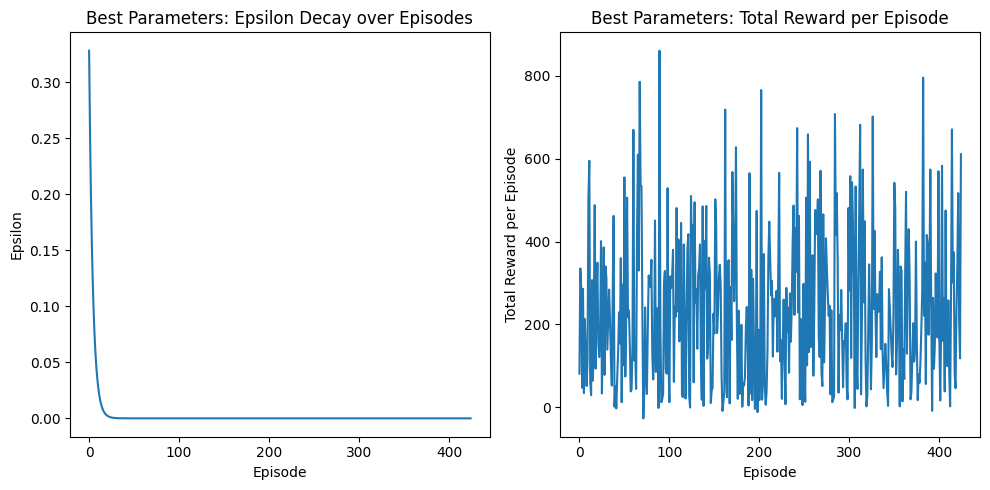

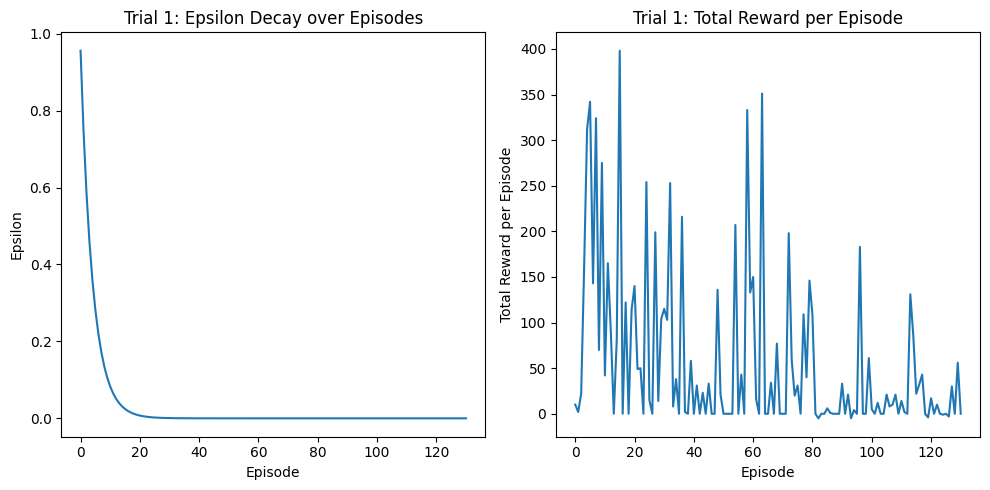

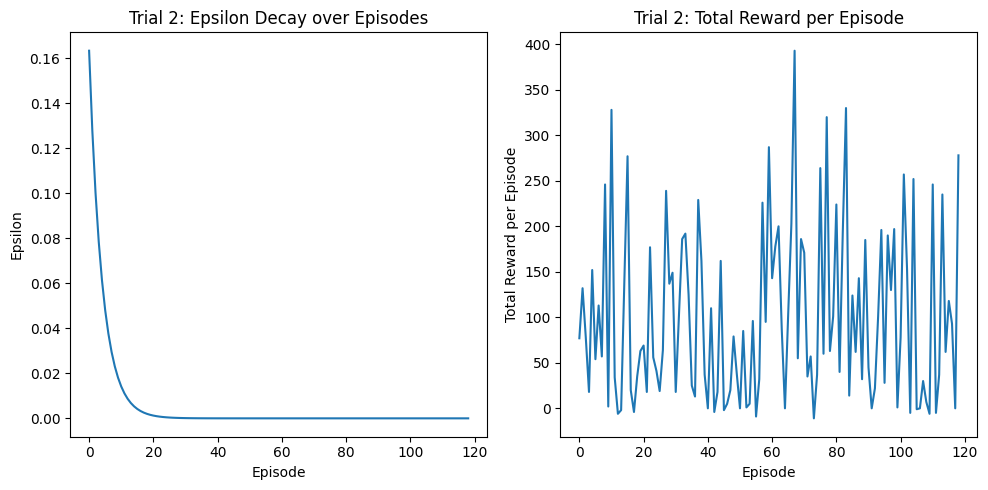

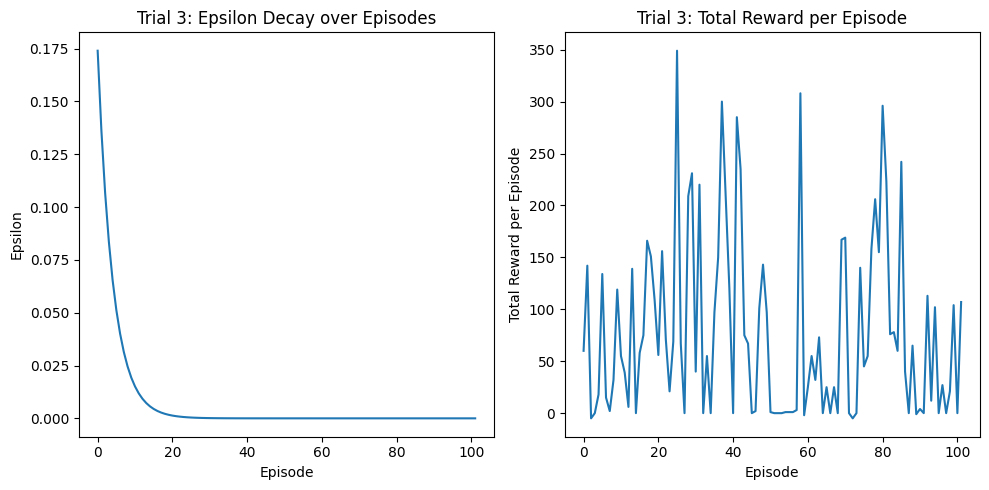

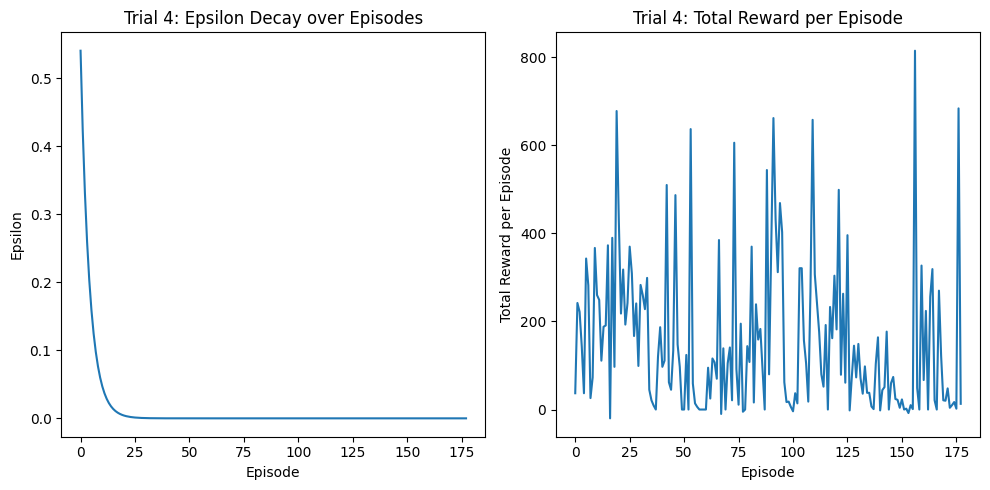

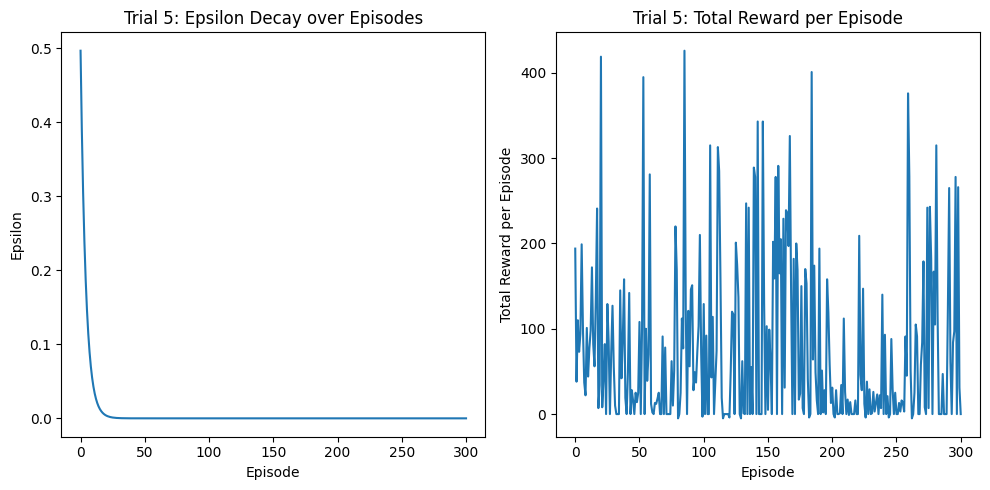

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces
import optuna

class LawnmowerGridWorld(gym.Env):
    def __init__(self):
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Tuple((spaces.Discrete(4), spaces.Discrete(4)))
        self.state = np.array([0, 0])
        self.goal = np.array([3, 3])
        self.grid_rewards = np.array([
            [0, -5, 0, 5],
            [0, 6, -6, 0],
            [-5, 0, 6, 0],
            [0, 0, 0, 10]
        ])

    def step(self, action):
        if action == 0:  
            self.state[0] = max(0, self.state[0] - 1)
        elif action == 1:  
            self.state[0] = min(3, self.state[0] + 1)
        elif action == 2:  
            self.state[1] = min(3, self.state[1] + 1)
        elif action == 3:
            self.state[1] = max(0, self.state[1] - 1)

        reward = self.grid_rewards[self.state[0], self.state[1]]
        done = (self.state == self.goal).all()

        return self.state, reward, done, {}

    def reset(self):
        self.state = np.array([0, 0])
        return self.state

    def render(self):
        plt.imshow(self.grid_rewards, cmap='coolwarm', interpolation='nearest')
        plt.text(self.goal[1], self.goal[0], 'Goal', ha='center', va='center', color='black')
        plt.text(self.state[1], self.state[0], 'Current', ha='center', va='center', color='black')
        plt.show()


def sarsa(env, gamma, epsilon, epsilon_decay, epsilon_min, num_episodes, max_timesteps, alpha=0.1):
    Q = np.zeros((4, 4, env.action_space.n))

    rewards_per_episode = []

    for episode in range(num_episodes):
        state = env.reset()
        done = False
        total_reward = 0

        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state[0], state[1]])

        for t in range(max_timesteps):
            next_state, reward, done, _ = env.step(action)
            next_action = np.argmax(Q[next_state[0], next_state[1]])

            if np.random.rand() < epsilon:
                next_action = env.action_space.sample()

            target = reward + gamma * Q[next_state[0], next_state[1], next_action]
            Q[state[0], state[1], action] += alpha * (target - Q[state[0], state[1], action])

            state = next_state
            action = next_action
            total_reward += reward

            if done:
                break

        rewards_per_episode.append(total_reward)
        epsilon = max(epsilon_min, epsilon * epsilon_decay)

    return Q, rewards_per_episode

def objective(trial):
    gamma = trial.suggest_float("gamma", 0.7, 1.0)
    epsilon = trial.suggest_float("epsilon", 0.1, 1.0)
    epsilon_decay = trial.suggest_float("epsilon_decay", 0.7, 1.0)
    epsilon_min = trial.suggest_float("epsilon_min", 0.01, 0.1)
    num_episodes = trial.suggest_int("num_episodes", 100, 500)
    max_timesteps = trial.suggest_int("max_timesteps", 50, 200)

    _, rewards_per_episode = sarsa(env, gamma, epsilon, epsilon_decay, epsilon_min, num_episodes, max_timesteps)

    return epsilon, rewards_per_episode


def optimize_hyperparameters(env, n_trials=50):
    study = optuna.create_study(direction="maximize")
    trial_results = []

    for trial_number in range(n_trials):
        trial = study.ask()
        epsilon, rewards_per_episode = objective(trial)
        study.tell(trial, np.mean(rewards_per_episode))
        trial_results.append((epsilon, rewards_per_episode))

        print(f"Trial {trial_number + 1}:")
        print(f"Objective value (average reward): {np.mean(rewards_per_episode)}")
        print(f"Hyperparameters: {trial.params}\n")

    best_params = study.best_params
    print(f"\nBest hyperparameters: {best_params}")

    return best_params, trial_results

def plot_trial_results(trial_results, epsilon_decay):
    for i, (epsilon, rewards_per_episode) in enumerate(trial_results[:5], 1):
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.plot([epsilon * (epsilon_decay ** i) for i in range(len(rewards_per_episode))])
        plt.xlabel('Episode')
        plt.ylabel('Epsilon')
        plt.title(f'Trial {i}: Epsilon Decay over Episodes')

        plt.subplot(1, 2, 2)
        plt.plot(rewards_per_episode)
        plt.xlabel('Episode')
        plt.ylabel('Total Reward per Episode')
        plt.title(f'Trial {i}: Total Reward per Episode')

        plt.tight_layout()
        plt.show()

def run_optimized_sarsa(env, best_params, trial_results):
    num_episodes = best_params["num_episodes"]
    max_timesteps = best_params["max_timesteps"]
    epsilon_decay = best_params["epsilon_decay"]

    Q, rewards_per_episode = sarsa(env, best_params["gamma"], best_params["epsilon"], epsilon_decay,
                                   best_params["epsilon_min"], num_episodes, max_timesteps)

    epsilon = best_params["epsilon"]

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot([epsilon * (epsilon_decay ** i) for i in range(num_episodes)])
    plt.xlabel('Episode')
    plt.ylabel('Epsilon')
    plt.title('Best Parameters: Epsilon Decay over Episodes')

    plt.subplot(1, 2, 2)
    plt.plot(rewards_per_episode)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward per Episode')
    plt.title('Best Parameters: Total Reward per Episode')

    plt.tight_layout()
    plt.show()

    plot_trial_results(trial_results, epsilon_decay)

if __name__ == "__main__":
    env = LawnmowerGridWorld()
    best_params, trial_results = optimize_hyperparameters(env)
    run_optimized_sarsa(env, best_params, trial_results)

## Part 3: Solve your environment using Q-learning

In [20]:
env = LawnmowerGridWorld()

def train_agent_Q_learning(env, lr, df, exploration_rate,min_exploration_rate, exploration_decay_rate, num_episodes, maximum_steps):

    num_states = np.prod([space.n for space in env.observation_space])
    num_actions = env.action_space.n
    Q = np.zeros((num_states, num_actions))

    rewards_per_episode = []
    epsilon_values = []

    for episode in range(num_episodes):
        state = env.reset()
        state = np.ravel_multi_index(state, [space.n for space in env.observation_space])
        exploration_rate = max(min_exploration_rate, exploration_rate * exploration_decay_rate)
        epsilon_values.append(exploration_rate)

        total_reward = 0
        state_path = []

        for step in range(maximum_steps):
            if np.random.random() < exploration_rate:
                action = np.random.randint(num_actions)
            else:
                action = np.argmax(Q[state])

            next_state, reward, done, _ = env.step(action)
            total_reward += reward
            next_state = np.ravel_multi_index(next_state, [space.n for space in env.observation_space])

            state_path.append(next_state)

            # Update Q-value
            max_next_q = np.max(Q[next_state])
            Q[state, action] += lr * (reward + df * max_next_q - Q[state, action])

            state = next_state

            if done:
                break

        rewards_per_episode.append(total_reward)
        # print(f"Episode {episode + 1}: {state_path}")
    
    return Q, rewards_per_episode, epsilon_values



In [7]:
lr = 1e-4
df = 0.88
exploration_rate = 0.89
min_exploration_rate = 1e-2
exploration_decay_rate = 0.89
num_episodes = 500
maximum_steps = 50

Q_values, qlearning_rewards, qlearning_epsilon_values = train_agent_Q_learning(env, lr, df, exploration_rate,min_exploration_rate, exploration_decay_rate, num_episodes, maximum_steps)

Episode 1: [0, 4, 0, 0, 1, 1, 2, 6, 10, 6, 10, 9, 5, 9, 13, 14, 10, 14, 14, 14, 14, 15]
Episode 2: [1, 5, 1, 1, 5, 1, 0, 0, 4, 4, 5, 6, 2, 2, 1, 1, 5, 9, 13, 9, 10, 9, 10, 14, 15]
Episode 3: [4, 4, 8, 9, 5, 6, 5, 9, 8, 9, 5, 9, 10, 9, 5, 9, 13, 12, 12, 8, 9, 5, 9, 5, 6, 10, 9, 5, 9, 5, 9, 10, 9, 5, 9, 5, 9, 13, 14, 15]
Episode 4: [0, 1, 5, 9, 8, 9, 5, 9, 5, 1, 5, 9, 13, 12, 12, 12, 8, 8, 4, 5, 9, 5, 9, 8, 9, 10, 9, 8, 9, 5, 4, 0, 1, 1, 5, 9, 5, 9, 5, 1, 5, 9, 5, 6, 10, 9, 8, 12, 8, 12]
Episode 5: [4, 4, 5, 9, 8, 12, 12, 12, 12, 8, 4, 4, 5, 4, 5, 9, 5, 4, 5, 9, 5, 4, 4, 8, 9, 8, 9, 10, 9, 5, 6, 5, 6, 5, 9, 5, 9, 5, 9, 8, 9, 5, 1, 5, 9, 5, 1, 5, 4, 5]
Episode 6: [4, 5, 4, 0, 4, 5, 9, 5, 9, 5, 9, 5, 4, 0, 4, 8, 8, 9, 8, 9, 5, 9, 10, 14, 15]
Episode 7: [4, 5, 9, 5, 9, 8, 8, 4, 5, 9, 5, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 7, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 1, 5, 6, 10, 6, 10, 9, 5, 9, 5]
Episode 8: [4, 5, 9, 5, 9, 13, 14, 15]
Episode 9: [0, 4, 8, 8, 9, 5, 9, 5, 9, 5, 9, 5, 9

In [8]:
gamma = 0.9494300610408426
epsilon = 0.18271697879940435
epsilon_decay = 0.9791710189722946
epsilon_min = 0.08689642074717335
num_episodes = 354
max_timesteps = 195

Q_sarsa, rewards_per_episode_sarsa = sarsa(env, gamma=gamma, epsilon=epsilon, epsilon_decay=epsilon_decay, epsilon_min=epsilon_min, num_episodes=num_episodes, max_timesteps=max_timesteps)

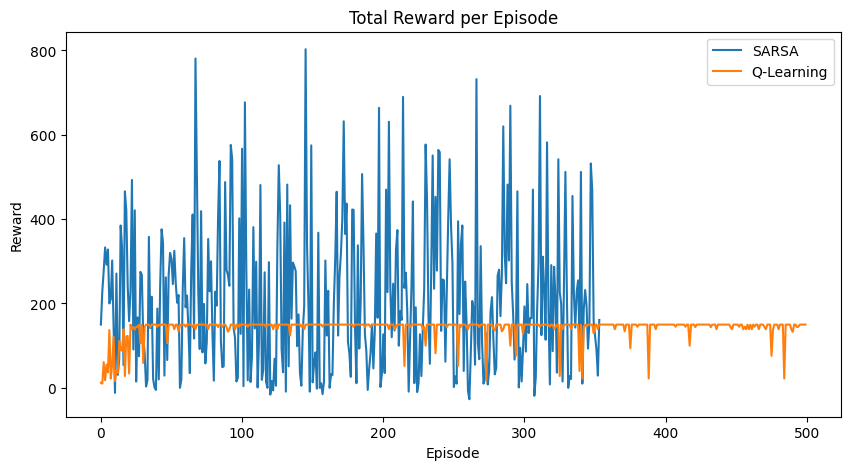

In [9]:
# Plot comparison
plt.figure(figsize=(10, 5))
plt.plot(rewards_per_episode_sarsa, label='SARSA')
plt.plot(qlearning_rewards, label='Q-Learning')
plt.title("Total Reward per Episode")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.legend()
plt.show()

In [10]:
print("rewards_per_episode_sarsa ",rewards_per_episode_sarsa)
print("qlearning_rewards ", qlearning_rewards)

rewards_per_episode_sarsa  [150, 228, 278, 333, 292, 328, 200, 210, 302, 148, -12, 271, 31, 68, 385, 332, 54, 466, 421, 241, 158, 231, 493, 91, 421, 15, 167, 75, 275, 268, 119, 82, 3, 18, 358, 142, 216, 21, 1, -5, 188, 20, 244, 376, 344, 29, 262, 66, 267, 320, 306, 246, 325, 250, 202, 220, 0, 20, 236, 355, 191, 219, 141, 35, 281, 411, 117, 781, 495, 226, 92, 419, 84, 199, 58, 109, 353, 229, 300, 132, 17, 228, 195, 404, 538, 111, 49, 51, 488, 279, 268, 242, 576, 543, 142, 119, 15, 24, 402, 128, 567, 4, 677, 288, 18, 233, 14, 74, 381, 141, 299, 1, 112, 481, 19, 43, 274, 14, 0, 298, -16, 16, -6, 69, 5, 333, 528, 411, 92, 37, 392, -9, 482, 51, 433, 164, 297, 288, 277, 99, 174, 35, 5, 135, 194, 803, 338, 197, -9, 575, 13, 58, 84, -2, 368, 0, 11, -15, 14, 302, 124, 230, 0, 32, 30, 200, 309, 465, 124, 265, 318, 400, 632, 365, 437, 109, 82, 26, 423, 422, 141, 11, 338, 93, 205, 507, 339, 127, 88, -5, 45, 82, 150, 46, 135, 366, 166, 664, 2, 32, 127, 35, 470, 227, 631, 238, 120, 247, 136, 327, 37

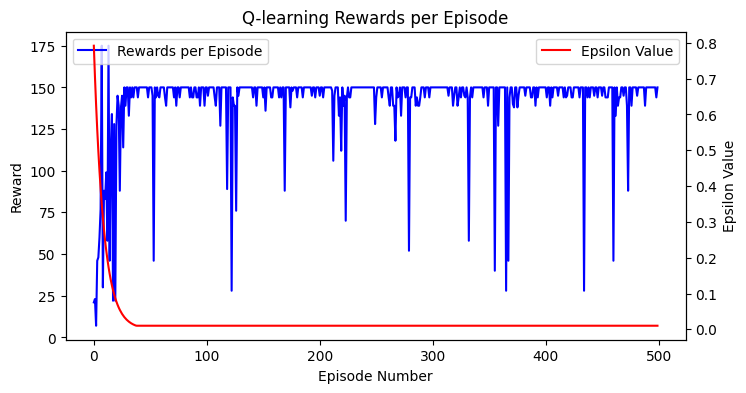

In [28]:
fig, reward_ax = plt.subplots(figsize=(8, 4))
epsilon_ax = reward_ax.twinx()

# Plot rewards per episode
reward_ax.plot(qlearning_rewards, label="Rewards per Episode", color='blue')
reward_ax.set_xlabel("Episode Number")
reward_ax.set_ylabel("Reward")
reward_ax.set_title("Q-learning Rewards per Episode")

# Plot epsilon decay
epsilon_ax.plot(qlearning_epsilon_values, label="Epsilon Value", color='red')
epsilon_ax.set_ylabel("Epsilon Value")

# Set legends
reward_ax.legend(loc='upper left')
epsilon_ax.legend(loc='upper right')

plt.show()

### Hyperparameter Tuning

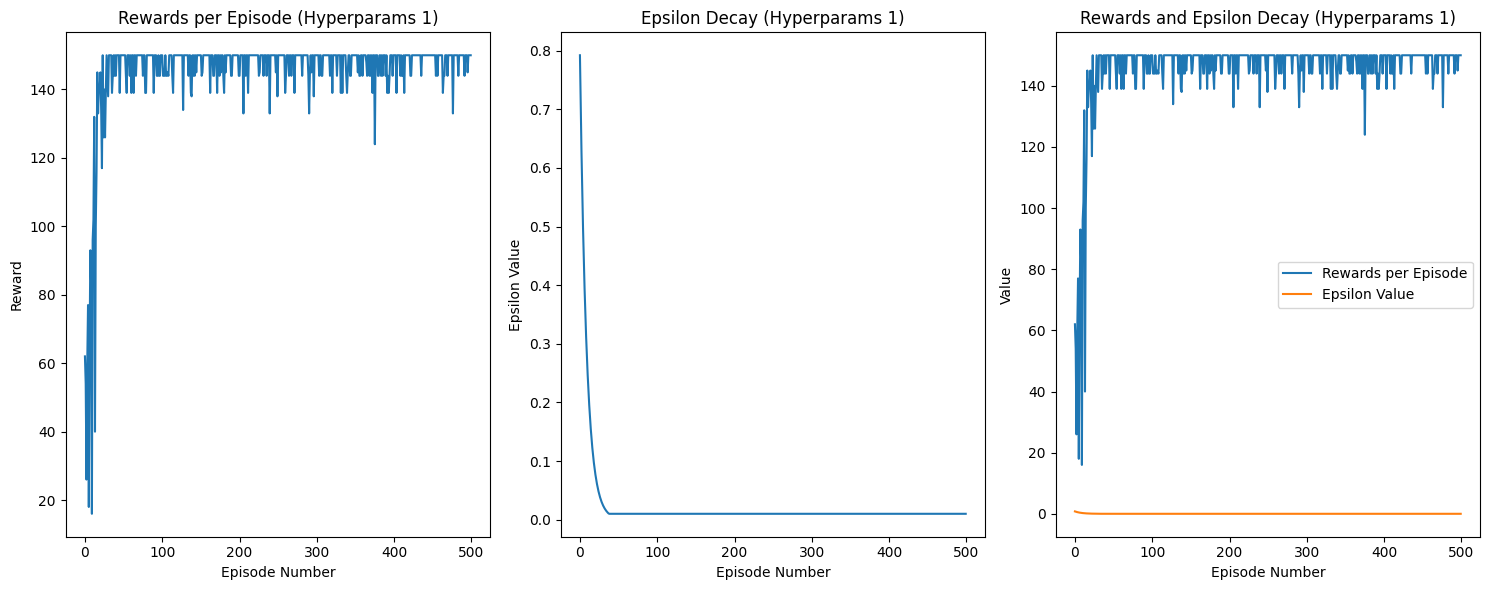

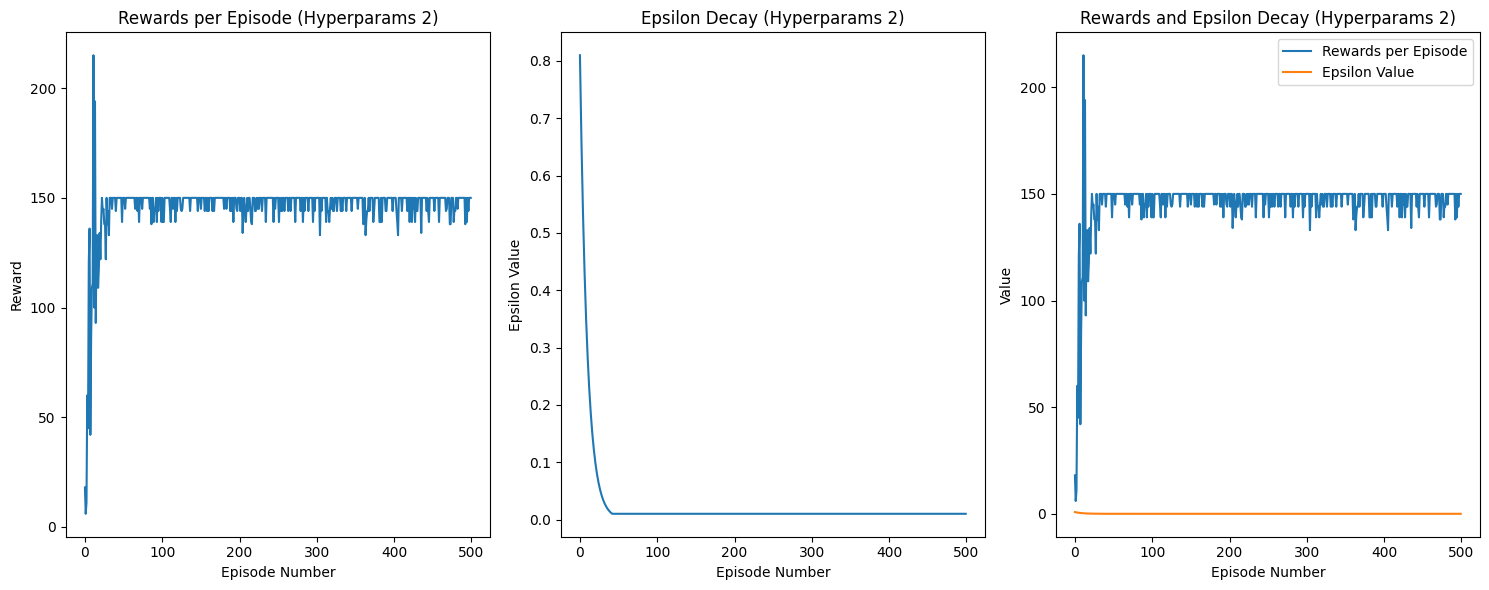

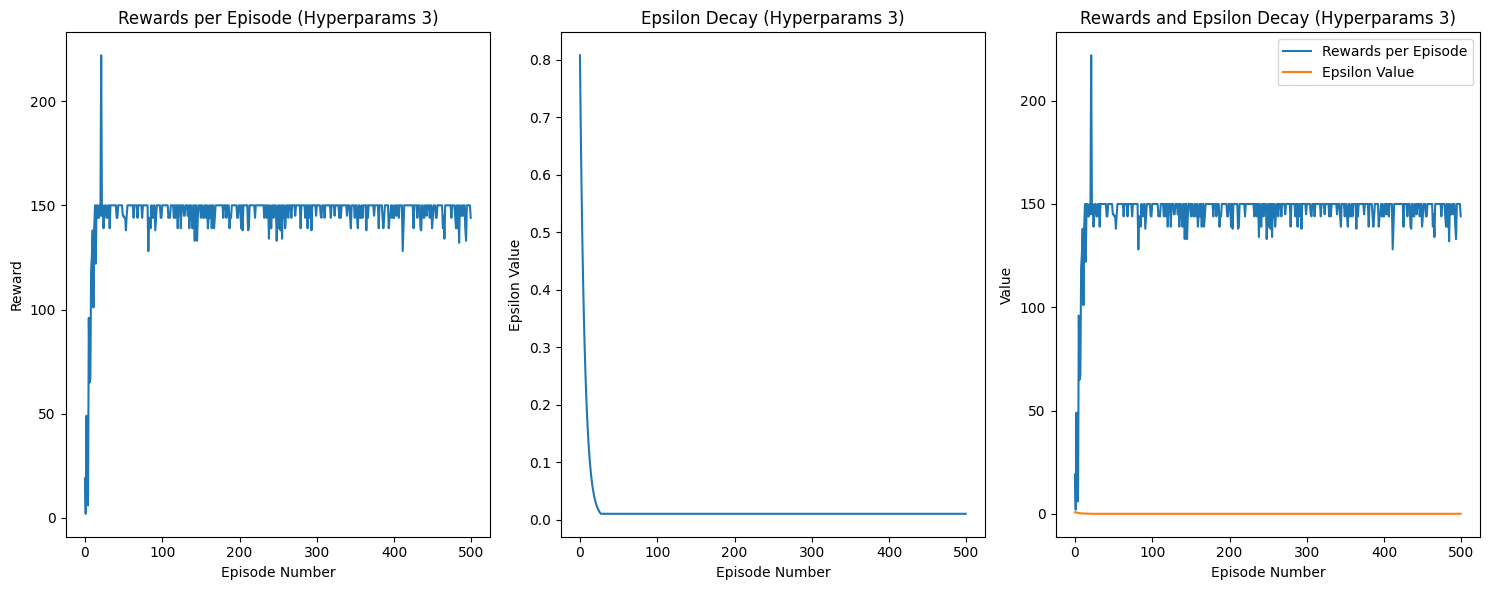

In [29]:

# Set different hyperparameter configurations
hyperparams = [
    {'lr': 1e-4, 'df': 0.8, 'exploration_rate': 0.89, 'min_exploration_rate':1e-2 ,'exploration_decay_rate': 0.89, 'num_episodes': 500, 'maximum_steps':50},
    {'lr': 1e-3, 'df': 0.9, 'exploration_rate': 0.9, 'min_exploration_rate':1e-2 ,'exploration_decay_rate': 0.9, 'num_episodes': 500, 'maximum_steps':50},
    {'lr': 1e-5, 'df': 0.7, 'exploration_rate': 0.95, 'min_exploration_rate':1e-2 ,'exploration_decay_rate': 0.85, 'num_episodes': 500, 'maximum_steps':50}
]

# Train and plot for each hyperparameter configuration
for i, params in enumerate(hyperparams):
    # Train the agent with Q-learning
    Q_values, rewards_per_episode, epsilon_values = train_agent_Q_learning(env, **params)
    
    plt.figure(figsize=(15, 6))
    
    plt.subplot(1, 3, 1)
    # Plot rewards per episode
    plt.plot(rewards_per_episode)
    plt.xlabel("Episode Number")
    plt.ylabel("Reward")
    plt.title(f"Rewards per Episode (Hyperparams {i+1})")
    
    plt.subplot(1, 3, 2)
    # Plot epsilon values
    plt.plot(epsilon_values)
    plt.xlabel("Episode Number")
    plt.ylabel("Epsilon Value")
    plt.title(f"Epsilon Decay (Hyperparams {i+1})")
    
    plt.subplot(1, 3, 3)
    # Plot rewards per episode and epsilon values together
    plt.plot(rewards_per_episode, label="Rewards per Episode")
    plt.plot(epsilon_values, label="Epsilon Value")
    plt.xlabel("Episode Number")
    plt.ylabel("Value")
    plt.title(f"Rewards and Epsilon Decay (Hyperparams {i+1})")
    plt.legend()
    plt.tight_layout()
    plt.show()


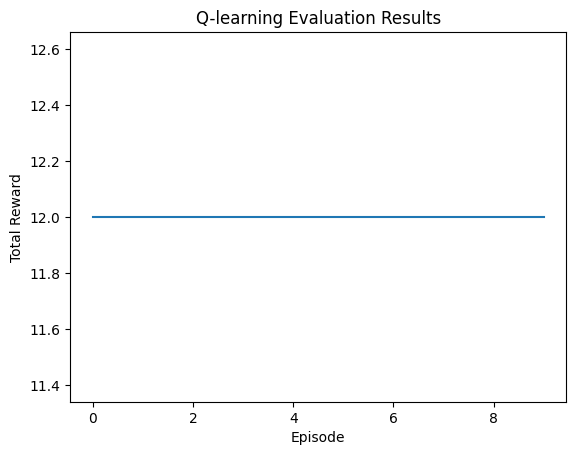

In [25]:
def evaluate_agent(env, Q_values, num_episodes=10, maximum_steps=50):
    rewards_per_episode = []

    for episode in range(num_episodes):
        state = env.reset()
        state = np.ravel_multi_index(state, [space.n for space in env.observation_space])
        total_reward = 0

        for step in range(maximum_steps):
            action = np.argmax(Q_values[state])
            next_state, reward, done, _ = env.step(action)
            total_reward += reward
            next_state = np.ravel_multi_index(next_state, [space.n for space in env.observation_space])

            state = next_state

            if done:
                break

        rewards_per_episode.append(total_reward)

    return rewards_per_episode
 
lr = 1e-4
df = 0.88
exploration_rate = 0.89
min_exploration_rate = 1e-2
exploration_decay_rate = 0.89
num_episodes = 500
maximum_steps = 50

Q_values, qlearning_rewards, qlearning_epsilon_values = train_agent_Q_learning(env, lr, df, exploration_rate,min_exploration_rate, exploration_decay_rate, num_episodes, maximum_steps)

evaluation_rewards = evaluate_agent(env, Q_values, num_episodes=10, maximum_steps=5)

# Plot the total reward per episode
plt.plot(evaluation_rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Q-learning Evaluation Results")
plt.show()


## Bonus: n-step SARSA

In [14]:
num_rows = env.observation_space[0].n
num_cols = env.observation_space[1].n
num_states = num_rows * num_cols
num_actions = env.action_space.n
Q = np.zeros((num_states, num_actions))

rewards_per_episode = []

lr = 1e-4
df = 9e-1
exploration_rate = 2
min_exploration_rate = 1e-2
exploration_decay_rate = 0.8
num_episodes = 500
maximum_steps = 50

for episode in range(num_episodes):
    state = env.reset()
    state = state[0] * num_cols + state[1]
    epsilon = max(min_exploration_rate, exploration_rate * exploration_decay_rate ** episode)
    total_reward = 0

    for step in range(maximum_steps):
        if np.random.random() < epsilon:
            action = np.random.randint(num_actions)
        else:
            action = np.argmax(Q[state])

        next_state, reward, done, _ = env.step(action)
        next_state_idx = next_state[0] * num_cols + next_state[1]

        if np.random.random() < epsilon:
            next_action = np.random.randint(num_actions)
        else:
            next_action = np.argmax(Q[next_state_idx])

        target = reward + df * np.max(Q[next_state_idx])
        Q[state, action] += lr * (target - Q[state, action])

        state = next_state_idx
        total_reward += reward

        if done:
            break

    epsilon = max(min_exploration_rate, epsilon * exploration_decay_rate)
    rewards_per_episode.append(total_reward)

print(Q)
print(rewards_per_episode)


[[ 3.30744940e-07  7.30973298e-03 -2.99827845e-03  5.65511855e-07]
 [-2.99865623e-03  2.87367536e-02  6.30046338e-07  9.71951455e-12]
 [ 4.94922165e-07 -1.79928012e-03  3.00140972e-03 -2.99800855e-03]
 [ 2.50179466e-03  1.34985013e-06  1.29984201e-02  8.55025183e-07]
 [ 9.71679395e-11 -4.49748982e-03  3.39851177e-01  3.81190047e-05]
 [-2.18988345e-02  1.79627227e+00 -1.73504524e-02  3.86115825e-04]
 [ 9.00036003e-08  1.79982003e-03  5.85008088e-07  2.04908102e-02]
 [ 4.00030988e-03  1.07994600e-07  2.70008097e-07 -2.39877630e-03]
 [ 1.07950365e-06  0.00000000e+00  9.64381626e-03 -2.99924938e-03]
 [ 4.57783808e+00  4.31044607e-06  2.09672615e-02 -2.09461565e-02]
 [-2.39750638e-03  8.27838013e-07  3.23227921e-03  2.81914565e-04]
 [ 7.20016180e-07  3.99940004e-03  5.98438933e-06  2.06411747e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 5.79771002e-03  5.82415693e-10  5.39919004e-07  0.00000000e+00]
 [ 1.79982004e-03  0.00000000e+00  4.99900010e-03  8.10000000e

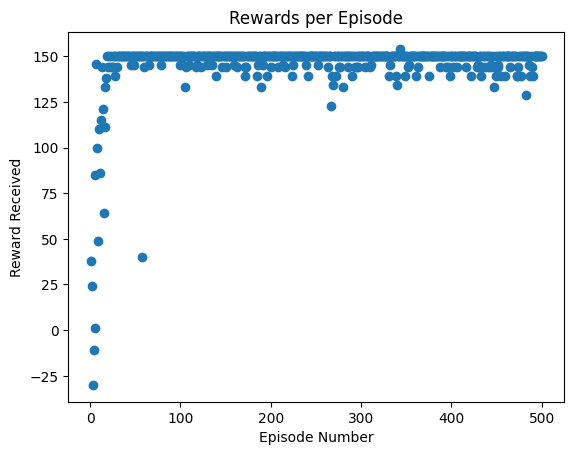

In [15]:
episode_numbers = range(1, len(rewards_per_episode) + 1)
plt.scatter(episode_numbers, rewards_per_episode)
plt.xlabel("Episode Number")
plt.ylabel("Reward Received")
plt.title("Rewards per Episode")
plt.show()